# Upper Confidence Bound (UCB)

## Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Importing the dataset

In [0]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [5]:
import math
N=1000
d=10
ads_selected=[]
number_of_selection=[0]*d
sum_of_rewards=[0]*d
total_reward=0

ads_selected.clear()
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
       if(number_of_selection[i]>0):
           avg_reward=sum_of_rewards[i]/number_of_selection[i]
           delta_i=math.sqrt((3/2) * (math.log(n+1)/number_of_selection[i]))
           upper_bound=avg_reward + delta_i
       else:
           upper_bound=1e400

       if(upper_bound>max_upper_bound):
           max_upper_bound=upper_bound
           ad=i

    ads_selected.append(ad)
    number_of_selection[ad]=number_of_selection[ad]+1
    reward=dataset.values[n,ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward=total_reward + reward

print(number_of_selection)
print(sum_of_rewards)
print(total_reward)


[109, 79, 53, 68, 287, 53, 86, 140, 64, 61]
[17, 8, 1, 5, 79, 1, 10, 27, 4, 3]
155


## Visualising the results

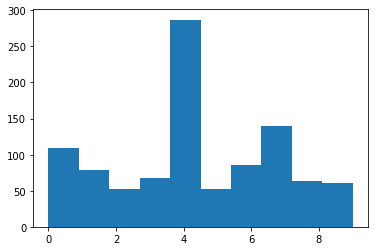

In [6]:
plt.hist(ads_selected)
plt.show()